In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2007 = "../../datasets/subsets/supp_ex/supp_ex_2007.csv"

supp_2007 = pd.read_csv(file_2007)
supp_2007 = supp_2007.set_index(['STNAME'])
supp_2007

,2007_E212,2007_E213,2007_E214,2007_E215,2007_E216,2007_E217,2007_E218,2007_E222,2007_E223,2007_E224,...,2007_E256,2007_E257,2007_E258,2007_E262,2007_E263,2007_E264,2007_E265,2007_E266,2007_E267,2007_E268
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,191608576,177829517,67583945,264651864,161420914,138037529,58838872,69611377,61006929,20114324,...,5353916,60790659,1678961,3039157.0,3587941.0,52316216.0,1855346.0,148773.0,54552.0,2764651.0
alaska,63148780,45896470,10269839,62380029,60570438,5986411,28005309,29215796,20291982,4857587,...,1787048,545643,1262908,897625.0,456329.0,1449941.0,241432.0,89233.0,15588.0,844945.0
arizona,288817574,130253917,53206272,279831030,272190346,146821712,148477989,79127750,33639683,13741145,...,39257769,51089597,19546915,123031115.0,436775.0,15573016.0,3078005.0,29525734.0,2907558.0,20220613.0
arkansas,129018148,165367369,58335399,166220588,125378571,74149887,52690280,31907875,39307022,16570400,...,12876096,26256232,5797047,356992.0,2566086.0,11606970.0,627553.0,1375635.0,493194.0,3097421.0
california,1889316977,2216587314,267225536,2721726633,2237676118,554923054,1323279454,577097120,672561571,99896937,...,55667853,53841161,45007525,241497.0,2720151.0,10457077.0,1678661.0,204229.0,93155.0,6401557.0
colorado,216959376,218070586,48315324,327401235,244804992,120606047,155158805,52461115,52435213,10913570,...,15153968,22641253,35577847,642466.0,3426761.0,4551278.0,5617996.0,614358.0,400296.0,4513251.0
connecticut,322008072,144706203,77226295,306743969,267423561,24096454,91602542,113023031,50189009,32041807,...,39620875,2319037,6081194,2104514.0,2084721.0,4855127.0,1749495.0,3422520.0,274565.0,4633202.0
delaware,45189579,12548562,8532234,52874704,47399325,17284966,36731028,20046751,5492128,3717946,...,3366663,5126068,45835,NaN,NaN,NaN,NaN,NaN,NaN,2555146.0
district of columbia,39156587,39247973,15416870,52842115,55240041,53829400,21088209,4056860,4314247,2433101,...,1487726,5953702,3290639,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
(supp_2007.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california    20.897380
texas         13.042269
new york      12.751319
new jersey     8.463812
florida        8.298902
dtype: float64

In [4]:
summary_2007 = pd.DataFrame(supp_2007.sum(axis=1)/100000000, columns=['Total SupportEx ($100M)'])
summary_2007['Salaries SupportEx ($100M)'] = supp_2007.iloc[:,0:7].sum(axis=1)/100000000
summary_2007['Benefits SupportEx ($100M)'] = supp_2007.iloc[:,7:14].sum(axis=1)/100000000
summary_2007['Services SupportEx ($100M)'] = supp_2007.iloc[:,14:21].sum(axis=1)/100000000
summary_2007['Supplies SupportEx ($100M)'] = supp_2007.iloc[:,21:28].sum(axis=1)/100000000
summary_2007['Property SupportEx ($100M)'] = supp_2007.iloc[:,28:35].sum(axis=1)/100000000
summary_2007['Other SupportEx ($100M)'] = supp_2007.iloc[:,35:42].sum(axis=1)/100000000
summary_2007

,Total SupportEx ($100M),Salaries SupportEx ($100M),Benefits SupportEx ($100M),Services SupportEx ($100M),Supplies SupportEx ($100M),Property SupportEx ($100M),Other SupportEx ($100M)
STNAME,,,,,,,
alabama,22.481574,10.599712,4.380541,2.579258,3.578786,0.705611,0.637666
alaska,6.579347,2.762573,1.352924,1.413386,0.925117,0.085396,0.039951
arizona,28.618967,13.195988,3.832409,4.840260,3.375932,1.426649,1.947728
arkansas,14.794201,7.711602,1.985248,2.215468,2.106795,0.573849,0.201239
california,208.973796,112.107351,38.132148,34.598610,22.079460,1.838264,0.217963
colorado,26.228257,13.313164,3.302416,5.827944,2.679428,0.907641,0.197664
connecticut,27.186776,12.338071,4.500837,7.060357,2.451821,0.644450,0.191241
delaware,5.232312,2.205604,0.998156,1.761079,0.145420,0.096501,0.025551
district of columbia,5.369611,2.768212,0.441377,1.347015,0.650560,0.162447,0.000000


In [5]:
summary_pct = pd.DataFrame(summary_2007['Salaries SupportEx ($100M)'] / summary_2007['Total SupportEx ($100M)'] *100, columns = ['Salaries (%)'])
summary_pct['Benefits (%)'] = summary_2007['Benefits SupportEx ($100M)'] / summary_2007['Total SupportEx ($100M)'] *100
summary_pct['Services (%)'] = summary_2007['Services SupportEx ($100M)'] / summary_2007['Total SupportEx ($100M)'] *100
summary_pct['Supplies (%)'] = summary_2007['Supplies SupportEx ($100M)'] / summary_2007['Total SupportEx ($100M)'] *100
summary_pct['Property (%)'] = summary_2007['Property SupportEx ($100M)'] / summary_2007['Total SupportEx ($100M)'] *100
summary_pct['Other (%)'] = summary_2007['Other SupportEx ($100M)'] / summary_2007['Total SupportEx ($100M)'] *100
summary_pct

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%)
STNAME,,,,,,
alabama,47.148444,19.485028,11.472763,15.918752,3.138618,2.836396
alaska,41.988553,20.563188,21.482168,14.060926,1.297947,0.607217
arizona,46.109241,13.391150,16.912770,11.796136,4.984977,6.805725
arkansas,52.125847,13.419093,14.975245,14.240683,3.878879,1.360253
california,53.646607,18.247335,16.556435,10.565660,0.879662,0.104302
colorado,50.758857,12.591061,22.220097,10.215807,3.460548,0.753630
connecticut,45.382618,16.555242,25.969820,9.018432,2.370452,0.703436
delaware,42.153526,19.076769,33.657758,2.779274,1.844333,0.488340
district of columbia,51.553309,8.219907,25.085894,12.115585,3.025305,0.000000


In [6]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2007.csv"

success_2007 = pd.read_csv(dropout_path)
success_2007

,STNAME,2007_DRP912,2007_DRP9,2007_DRP10,2007_DRP11,2007_DRP12,2007_DRPAM,2007_DRPAS,2007_DRPHI,2007_DRPBL,2007_DRPWH
0,alabama,2.299999,1.900000,2.599998,2.599998,2.500000,1.000000,0.700000,2.500000,2.799999,2.099998
1,alaska,7.299999,4.599998,6.599998,8.699997,9.599998,9.500000,6.699997,9.000000,10.000000,5.199997
2,arizona,7.599998,4.699997,5.699997,7.500000,13.199997,13.199997,4.099998,8.500000,7.899998,6.299999
3,arkansas,4.599998,2.900000,4.000000,5.599998,6.599998,4.500000,2.900000,5.500000,6.500000,4.000000
4,california,5.500000,3.199999,3.500000,4.500000,11.599998,7.699997,2.699999,6.799999,10.000000,3.500000
5,colorado,6.899998,5.399998,6.399998,7.099998,9.199997,12.500000,4.000000,13.799995,10.000000,4.299999
6,connecticut,2.099998,1.900000,2.099998,2.400000,1.900000,3.400000,1.099999,4.699997,3.599998,1.299999
7,delaware,5.500000,6.699997,5.699997,4.500000,4.399998,2.299999,2.299999,8.599998,7.099998,4.399998
8,district of columbia,7.099998,7.699997,7.599998,6.099998,6.500000,NaN,6.099998,11.000000,6.899998,1.599999
9,florida,3.799999,3.500000,3.699999,3.900000,4.399998,3.099998,1.799999,4.500000,5.799999,2.699999


In [8]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_pct['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
alabama,47.148444,19.485028,11.472763,15.918752,3.138618,2.836396,2.3
alaska,41.988553,20.563188,21.482168,14.060926,1.297947,0.607217,7.3
arizona,46.109241,13.391150,16.912770,11.796136,4.984977,6.805725,7.6
arkansas,52.125847,13.419093,14.975245,14.240683,3.878879,1.360253,4.6
california,53.646607,18.247335,16.556435,10.565660,0.879662,0.104302,5.5
colorado,50.758857,12.591061,22.220097,10.215807,3.460548,0.753630,6.9
connecticut,45.382618,16.555242,25.969820,9.018432,2.370452,0.703436,2.1
delaware,42.153526,19.076769,33.657758,2.779274,1.844333,0.488340,5.5
district of columbia,51.553309,8.219907,25.085894,12.115585,3.025305,0.000000,7.1


In [9]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Salaries (%),Benefits (%),Services (%),Supplies (%),Property (%),Other (%),Dropout Rate
STNAME,,,,,,,
arizona,46.109241,13.391150,16.912770,11.796136,4.984977,6.805725,7.6
louisiana,45.181823,17.076305,23.049798,10.693720,2.549548,1.448806,7.4
michigan,45.441819,22.312749,18.551769,9.514849,2.340716,1.838099,7.4
alaska,41.988553,20.563188,21.482168,14.060926,1.297947,0.607217,7.3
district of columbia,51.553309,8.219907,25.085894,12.115585,3.025305,0.000000,7.1
colorado,50.758857,12.591061,22.220097,10.215807,3.460548,0.753630,6.9
new mexico,49.029378,15.161118,25.265166,9.504977,0.837511,0.201850,6.1
rhode island,49.963693,22.999450,18.771705,6.909440,0.448285,0.907427,5.8
north carolina,58.120270,13.838017,19.272300,6.738154,0.807980,1.223279,5.7


In [10]:
summary_2007['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_2007['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    

summary_2007 = summary_2007[summary_2007['Dropout Rate'].notna()]
summary_2007['Dropout Rate'] = summary_2007['Dropout Rate'].astype(float)
summary_2007.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, alabama to wyoming
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total SupportEx ($100M)     49 non-null     float64
 1   Salaries SupportEx ($100M)  49 non-null     float64
 2   Benefits SupportEx ($100M)  49 non-null     float64
 3   Services SupportEx ($100M)  49 non-null     float64
 4   Supplies SupportEx ($100M)  49 non-null     float64
 5   Property SupportEx ($100M)  49 non-null     float64
 6   Other SupportEx ($100M)     49 non-null     float64
 7   Dropout Rate                49 non-null     float64
dtypes: float64(8)
memory usage: 3.4+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


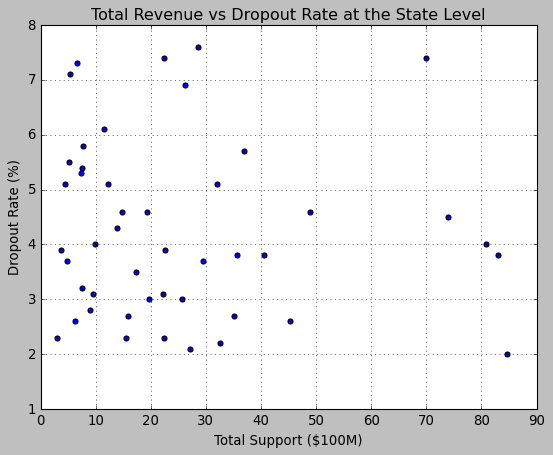

In [11]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2007['Total SupportEx ($100M)'], summary_2007['Dropout Rate'])
plt.xlabel('Total Support ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total Revenue vs Dropout Rate at the State Level")
plt.grid()

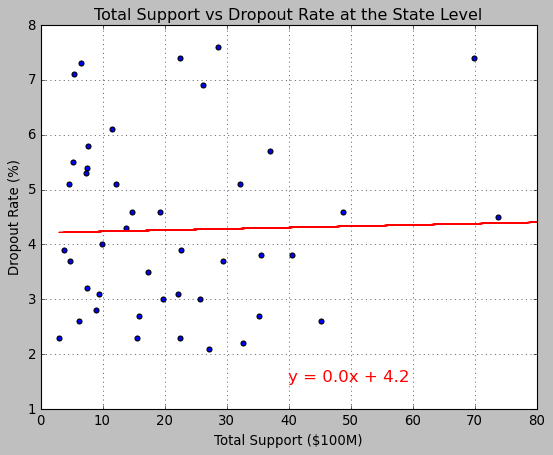

The correlation between both factors is 0.0591


In [12]:
# Total Support vs Dropout Rate
x_values = summary_2007['Total SupportEx ($100M)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Support ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Support vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 80)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

In [14]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_pct['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, alabama to wyoming
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salaries (%)  49 non-null     float64
 1   Benefits (%)  49 non-null     float64
 2   Services (%)  49 non-null     float64
 3   Supplies (%)  49 non-null     float64
 4   Property (%)  49 non-null     float64
 5   Other (%)     49 non-null     float64
 6   Dropout Rate  49 non-null     float64
dtypes: float64(7)
memory usage: 3.1+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


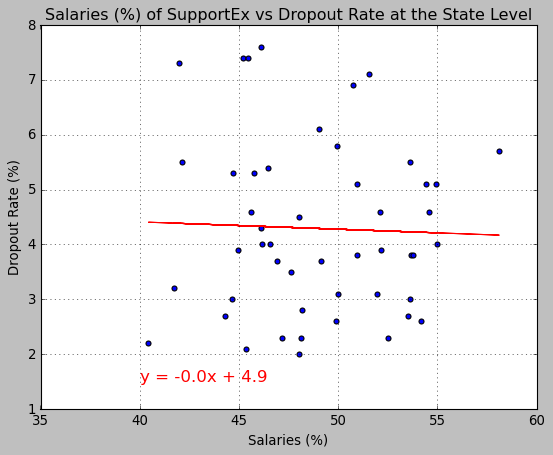

The correlation between both factors is -0.035


In [15]:
# Salaries (%) vs Dropout Rate
x_values = summary_pct['Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 35, right = 60)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

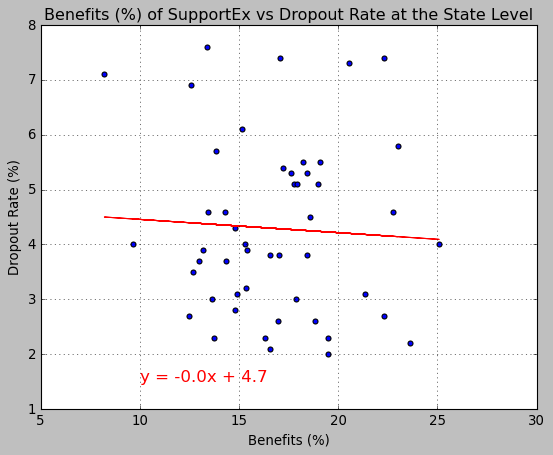

The correlation between both factors is -0.055


In [16]:
# Benefits (%) vs Dropout Rate
x_values = summary_pct['Benefits (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Benefits (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Benefits (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 30)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

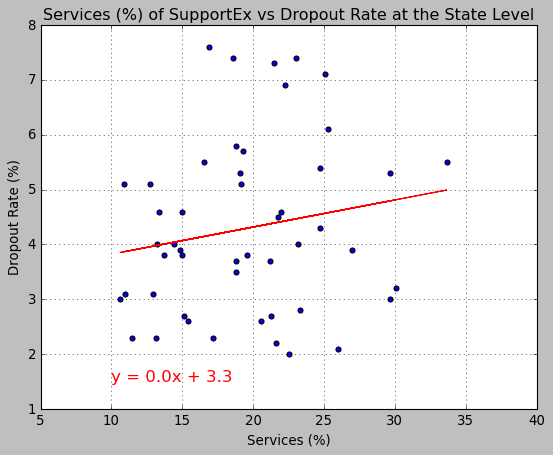

The correlation between both factors is 0.1749


In [17]:
# Services (%) vs Dropout Rate
x_values = summary_pct['Services (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Services (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Services (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 5, right = 40)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

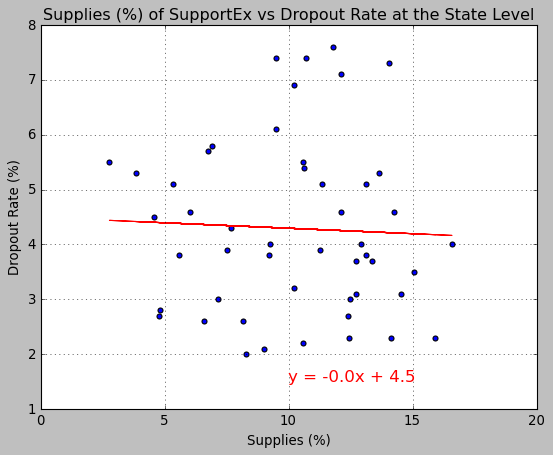

The correlation between both factors is -0.0434


In [18]:
# Supplies (%) vs Dropout Rate
x_values = summary_pct['Supplies (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1.5),fontsize=15,color="red")
plt.xlabel('Supplies (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Supplies (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 20)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

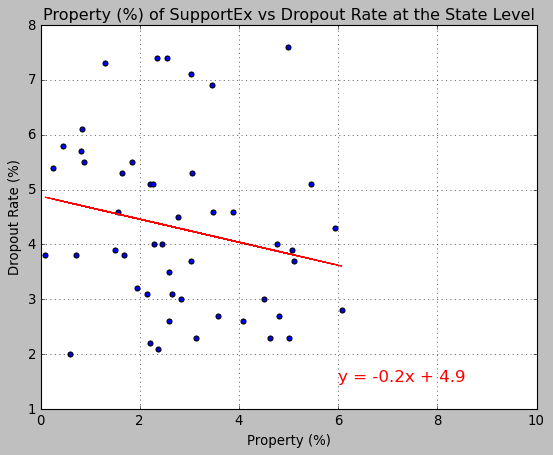

The correlation between both factors is -0.2095


In [19]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Property (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Property (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Property (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

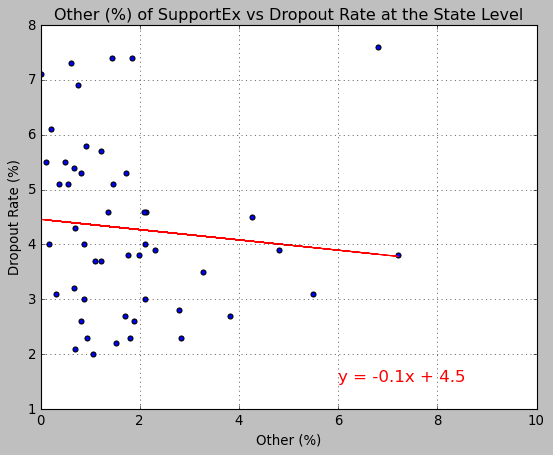

The correlation between both factors is -0.0962


In [20]:
# Property (%) vs Dropout Rate
x_values = summary_pct['Other (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,1.5),fontsize=15,color="red")
plt.xlabel('Other (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Other (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 10)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")